In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [25]:
nx = 601                # number of grid points
dx = 1000.0             # grid spacing = 1km
dt = 30.0               # time interval = 30 second
n_total = 1000          # final time step
out_step = 100          # number of time steps between output
                        # output is written every 30s x 50 = 25 mins
c = 15.0                # propagation speed > 0 (upwind) 
sigma = c * dt / dx
path = os.getcwd() + '\\figs\\'

In [3]:
def plot_n_save(n, data, path, save, out_step):
    if n%out_step == 0:
        title = str(n).zfill(5)
        filename = path + title + f'.png'
        fig = plt.figure(figsize = (6, 4), dpi = 80)
        ax = fig.add_subplot()
        ax.set_xlim(0,600)
        ax.set_ylim(-0.5,1.5)
        ax.set_ylabel('u (mag)', fontsize = 15)
        ax.set_xlabel('x (km)', fontsize = 15)
        ax.set_title(title, fontsize = 15)
        ax.set_facecolor('#E6E6E6')
        sns.lineplot(data = data[n])
        if save:
            plt.savefig(filename, dpi = 300)
        else:
            plt.show()
        plt.close()

In [15]:
def IC(nx):
    IC = np.zeros(nx)                                          #IC initialize
    IC[nx//2-10:nx//2+10] = np.cos(np.linspace(-1., 1., 20))   #IC
    return IC

In [11]:
def BC(BC_method, u_next, u_now):
    if BC_method == 'fixed':         #fixed in time boundary condition
        u_next[0] = u_now[0]         #BC@x=0
        u_next[-1] = u_now[-1]       #BC@x=L
        
    if BC_method == 'periodic':      #periodic boundary condition
        u_next[0] = u_next[-2]
        u_next[-1] = u_next[1]

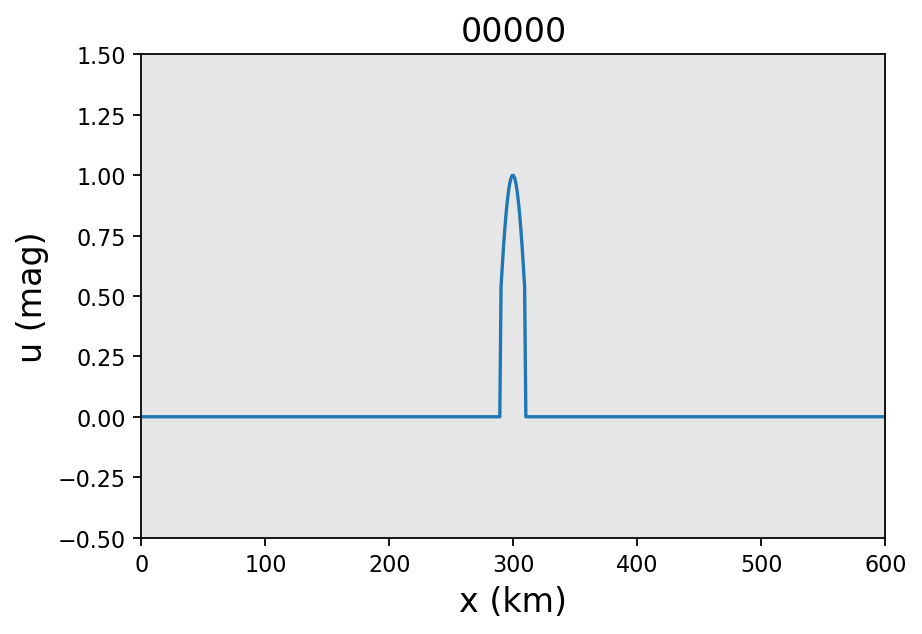

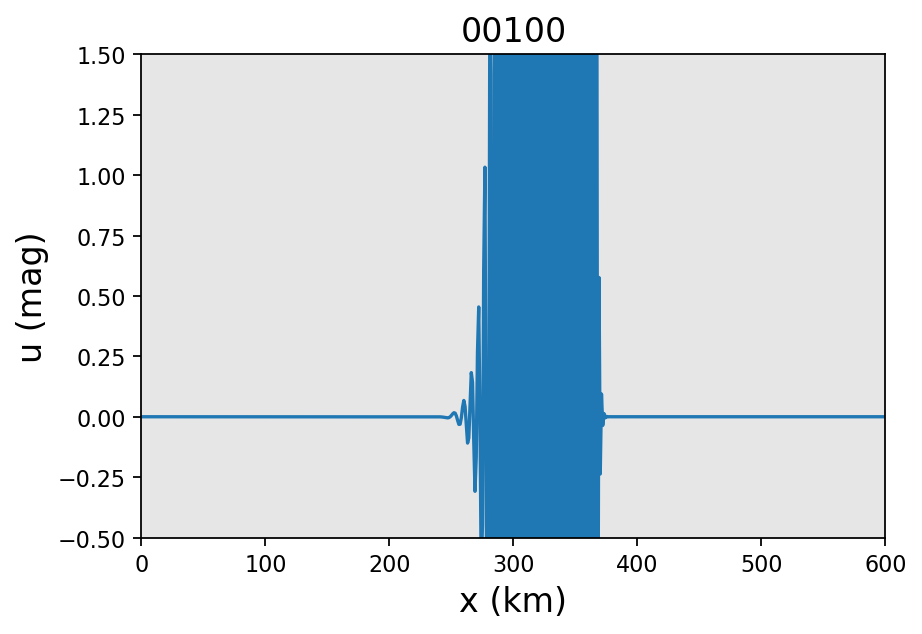

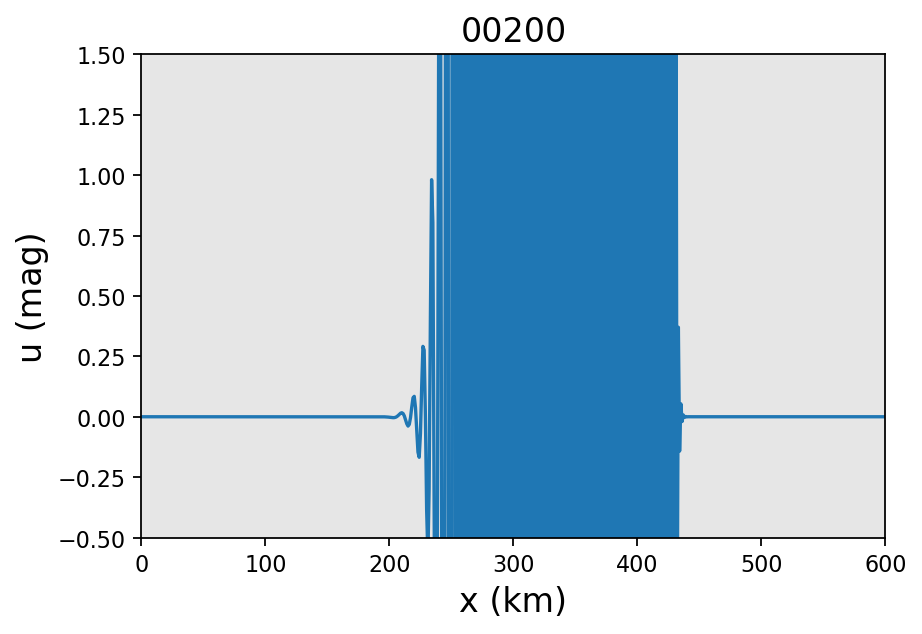

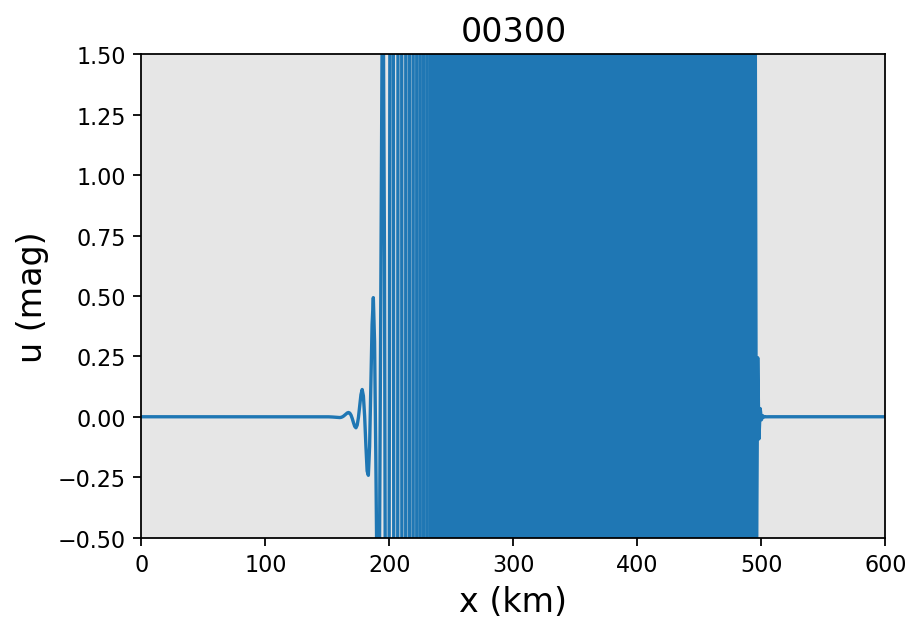

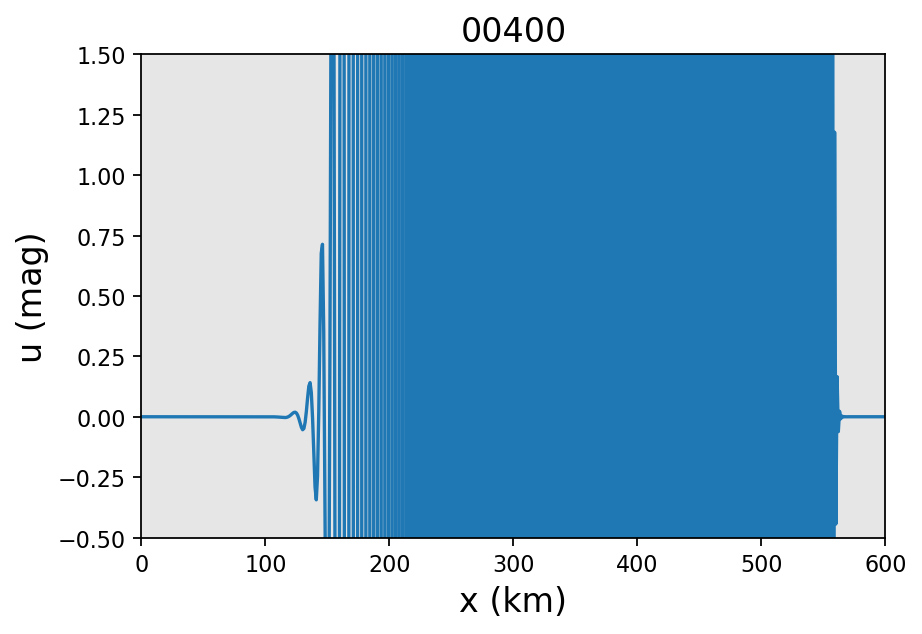

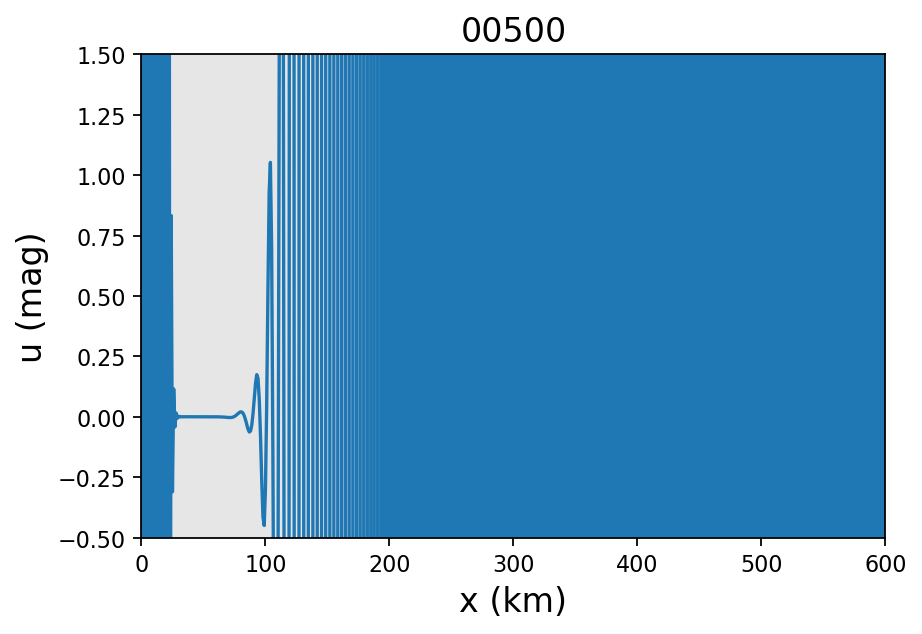

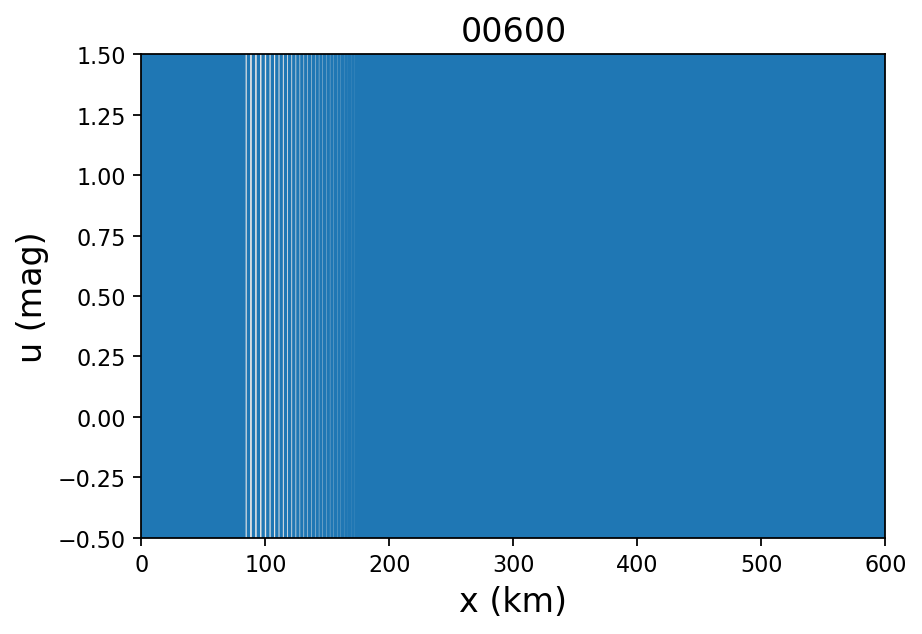

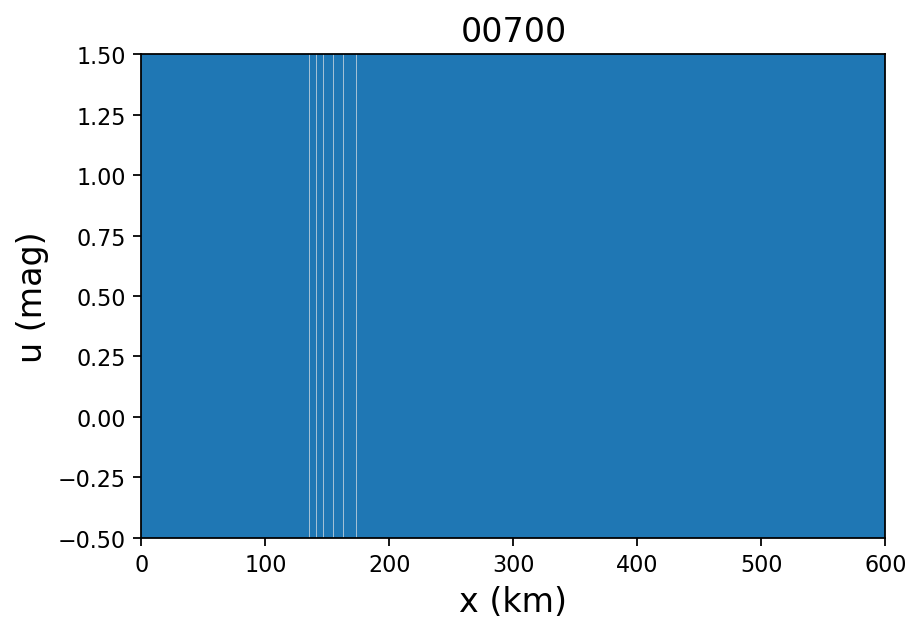

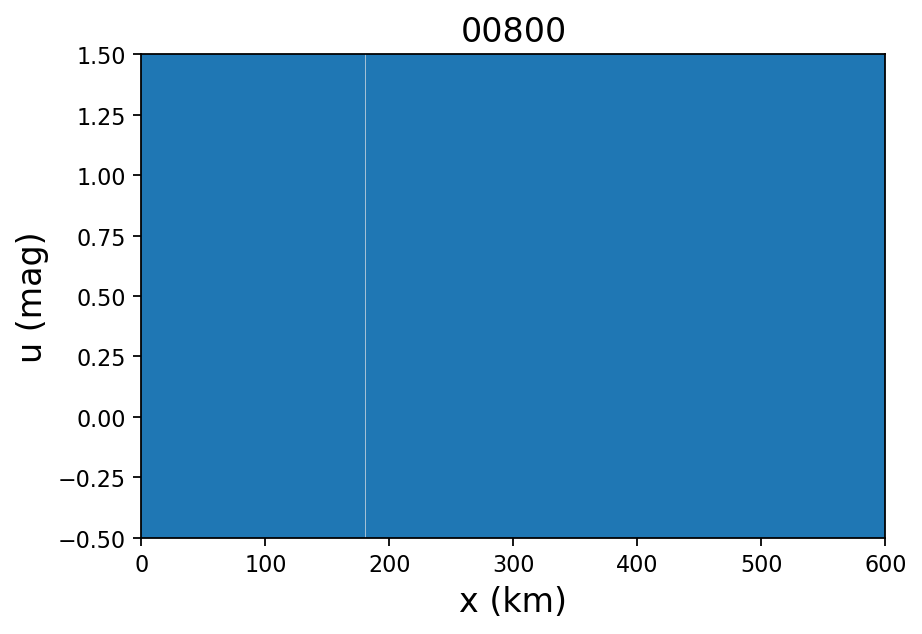

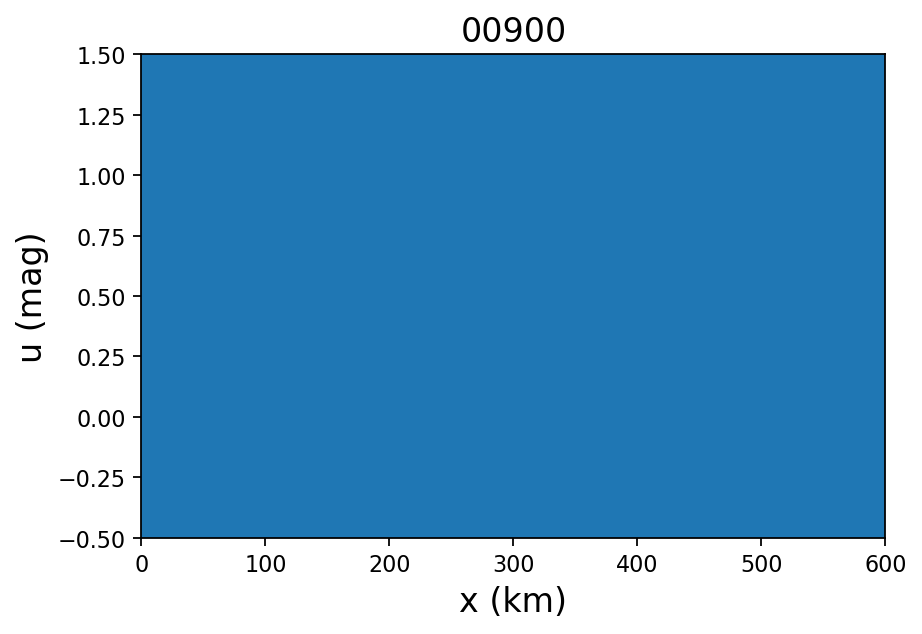

In [28]:
data = np.zeros((n_total, nx))
u_past = np.zeros(nx)
u_now = np.zeros(nx)
u_next = np.zeros(nx)
BC_method = 'periodic'
save = False

for n in range(n_total):
    if n == 0:
        u_next = np.copy(IC(nx))
    
    elif n == 1:
    #1st step
        u_next[1:nx] = u_now[1:nx] - sigma*(u_now[1:nx]-u_now[0:nx-1])       #FTBS
        BC(BC_method, u_next, u_now)
    
    else:
        u_next[1:nx-1] = u_past[1:nx-1] - sigma*(u_now[2:nx]-u_now[0:nx-2])  #CTCS
        BC(BC_method, u_next, u_now)
    
    u_past = np.copy(u_now)
    u_now = np.copy(u_next)
    data[n] = np.copy(u_now)  
    plot_n_save(n, data, path, save, out_step)

# np.savetxt('result.txt', data, fmt = '%.9g')

In [23]:
image_folder = 'figs'
video_name = f'wave_{BC_method}.mp4v'

images = [img for img in sorted(os.listdir(image_folder)) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(video_name, fourcc, 20, (width, height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()
        